# Исследование успешности видеоигр 

**Описание данных:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Описание проекта:** Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Даны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:** Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**План работ:**
* Открыть файл с данными и изучить общую информацию
* Подготовить данные
* Проведите исследовательский анализ данных
* Составить портрет пользователя каждого региона
* Проверить гипотезы
* Составить общий вывод

In [1]:
# Импорт библиотек
import pandas as pd
from numpy import NaN
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Открытие файла с данными и изучение общей информации

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating присутсвют пропуски. В столбце Year_of_Release нужно поменять тип данных на int. В столбце User_Score содержатся значения типа float и строка "tbd", тоже придется изменить тип данных. Также необходимо привести названия столбцов к нижнему регистру.

## Подготовка данных

### Оформление датафрейма

In [5]:
# Приведние к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Преобразование данных стобца year_of_release в целочисленный тип.
# Учитывая, что записан только год нецелесобразно использовать datetime или float
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [7]:
# Проверка преобразования
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [8]:
# Поиск явных дубликатов
data.duplicated().sum() 

0

In [9]:
# Поиск неявных дубликатов
data_duplicates = data[data.duplicated(subset=['name', 'platform'])]
data_duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


### Работа с пропусками

In [10]:
# Подсчет количества пропусков в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Были обнаружены пропуски в следующих столбцах:
- name (2)
- genre (2)
- year_of_release (269)
- user_score (6701)
- rating (6766)
- critic_score (8578)

#### Столбец rating

In [11]:
data['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [12]:
data['rating'] = data['rating'].fillna('Unknown')

#### Столбец user_score

In [13]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.7       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [14]:
data['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

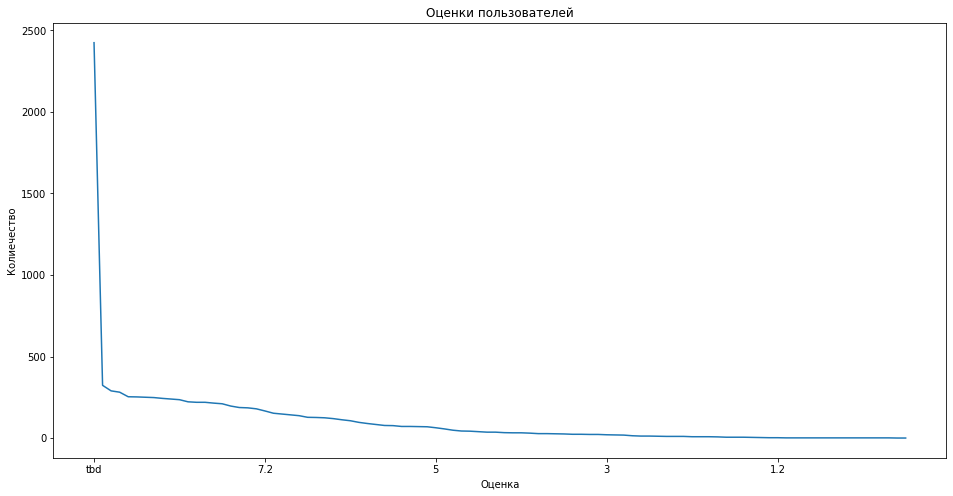

In [15]:
data['user_score'].value_counts().plot(figsize=(16, 8))
plt.title('Оценки пользователей')
plt.xlabel('Оценка')
plt.ylabel('Колиечество')
plt.show()

In [16]:
# tbd или же to be determined это незаполненные значения из-за недостатка количества данных, 
# поэтому заменим это значение на Nan и приведем стобец к типу данных float. 
data['user_score'] = data['user_score'].replace('tbd', NaN).astype('float')

In [17]:
# Пропусков слишком много и они могут мешать в последующей обработке данных, поэтому заполним их  
# значением, не лежащим в диапозоне реальных оценок. Например возьмем 11.
data['user_score'] = data['user_score'].fillna(11)

#### Столбец critic_score

In [18]:
data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [19]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

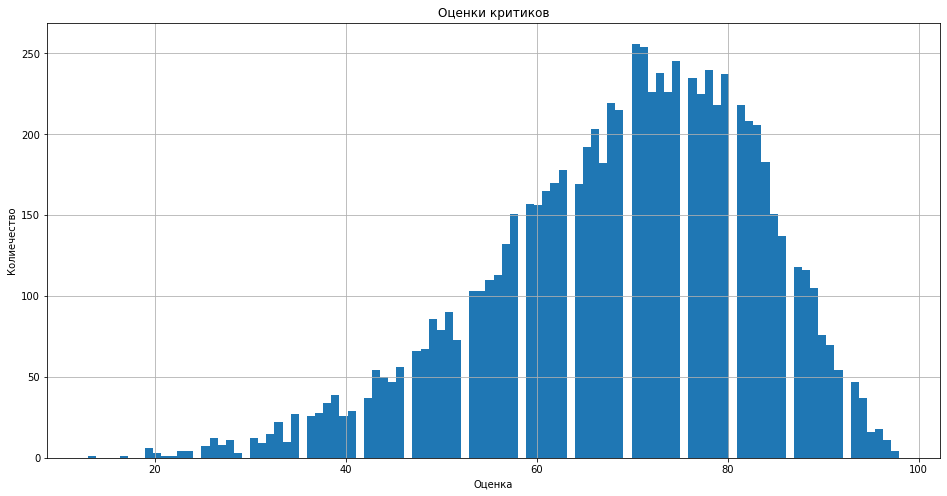

In [20]:
data['critic_score'].hist(bins=100, figsize=(16, 8))
plt.title('Оценки критиков')
plt.xlabel('Оценка')
plt.ylabel('Колиечество')
plt.show()

In [21]:
# Пропусков слишком много и они могут мешать в последующей обработке данных, поэтому заполним их  
# значением, не лежащим в диапозоне реальных оценок. Например возьмем 101.
data['critic_score'] = data['critic_score'].fillna(101)

In [22]:
# Подсчет количества пропусков в каждом столбце
data.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [23]:
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Подсчет суммарных продаж во всех регионах 

In [24]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,101.0,11.0,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,101.0,11.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,101.0,11.0,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,101.0,11.0,Unknown,0.01


### Поиск причин пропусков

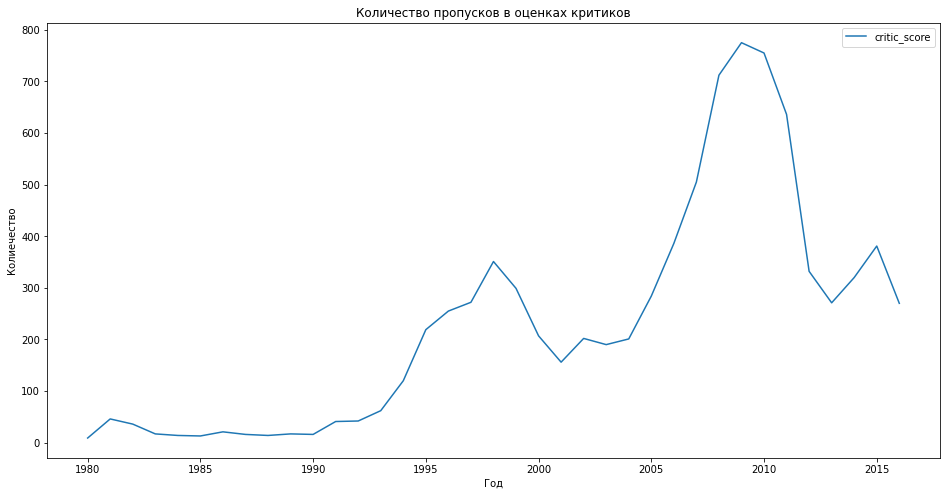

In [26]:
critic_score = data
critic_score = critic_score[critic_score['critic_score'] == 101]
critic_score = critic_score.pivot_table(index=['year_of_release'], values=['critic_score'], aggfunc=['count'])
critic_score.columns = ['critic_score']
critic_score.plot(figsize=(16, 8))
plt.title('Количество пропусков в оценках критиков')
plt.xlabel('Год')
plt.ylabel('Колиечество')
plt.show()

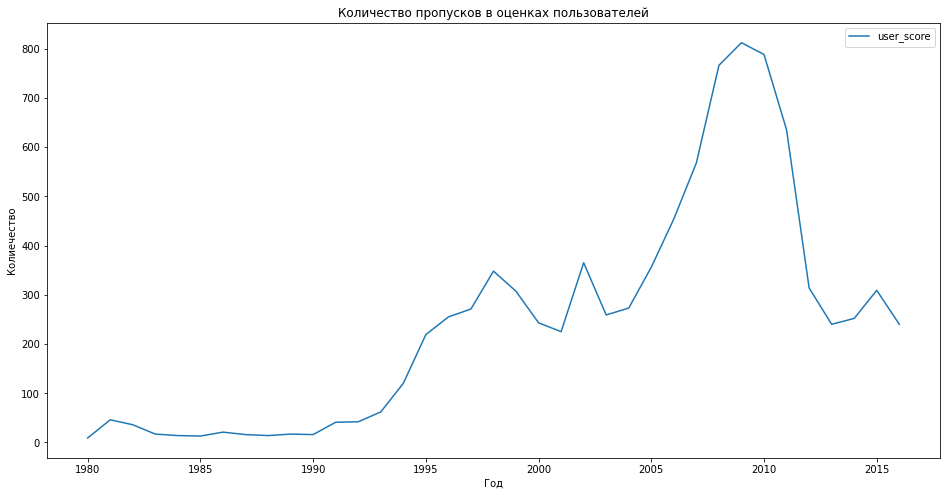

In [27]:
user_score = data
user_score = user_score[user_score['user_score'] == 11]
user_score = user_score.pivot_table(index=['year_of_release'], values=['user_score'], aggfunc=['count'])
user_score.columns = ['user_score']
user_score.plot(figsize=(16, 8))
plt.title('Количество пропусков в оценках пользователей')
plt.xlabel('Год')
plt.ylabel('Колиечество')
plt.show()

**Вывод:** Названия столбцов были приведены к нижнему регистру. Тип данных в столбцах year_of_release и critic_score был приведен к int.

Количесто пропусков в name, genre и year_of_release незначительно. Их заполнять не будем, так как нельзя логично обосновать критерии по которым можно было бы это сделать. 

Столбец rating также не представляется возможным заполнить, ввиду невозможности подсчитать среднее на основе стринговых данных, да и непонятно по какому принципу заполнять пропуски. 

В столбец user_score tbd (или же to be determined) это незаполненные значения из-за недостатка количества данных, поэтому было принято решение заменить это значение на Nan и привсти стобец к типу данных float. Далее для удобства обработки пустым значениям было присвоено значение 11, не лежащее в диапозоне реальных оценок. 

Столбец critic_score был заполнен по тому же принципу значением 101.

Причина пропусков: видно что больше всего пропусков оценок как критиков, так и игроков в промежутке с 2005 до 2010 года, также локальный пик виден между 1995 и 2000 годом. Возомжно, что тогда было не принято выставлять оценки или это было не популярно, так как массовая игровая индустрия только развивалась. Этот вывод можно сделать на основе того, что графики пропусков практические повторяют друг друга. Если бы причина была технического характера, то маловероятно, что она бы затронула оба столбца практически идентично.

## Исследовательский анализ данных

### Колиество выпускаемых игр в разные годы. 
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

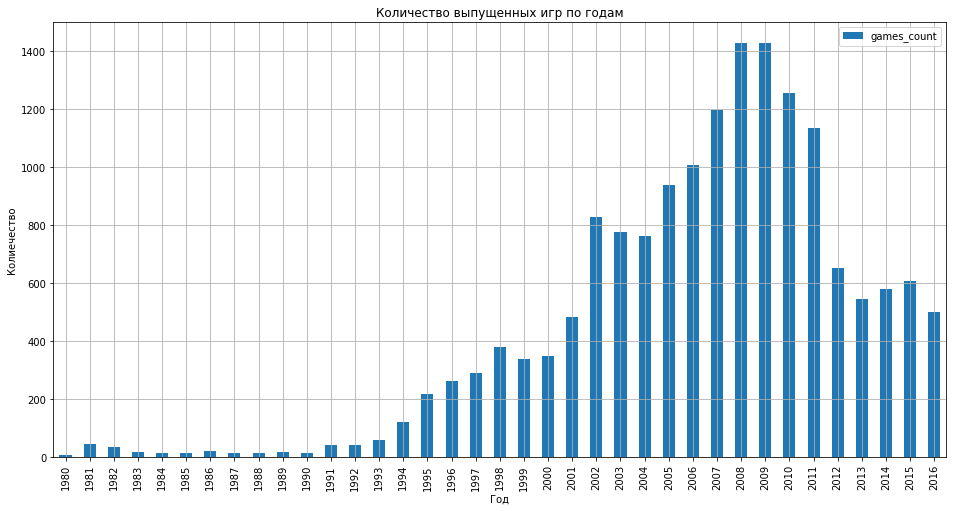

In [28]:
games_to_years = data.pivot_table(index=['year_of_release'], values=['name'], aggfunc=['count'])
games_to_years.columns = ['games_count']
games_to_years.plot(kind='bar', grid=True, figsize=(16, 8))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Колиечество')
plt.show()

In [29]:
games_to_years.describe()

,games_count
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


До 1995 года ежегодно выпускалось довольно мало игр, но после началось их активное производство, которое достигло своего пика в 2008-2009 годах, после чего в индустрии начался спад и выход на плато (с 2013 по 2016 годы количество выпускаемых игр было в диапозоне от 400 до 600). Скорее всего это было связано с развитием технологий и изменением качества видеоигр - они стали более комплексным и дорогими в производстве. 

### Изменение продаж по платформам. 
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [30]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

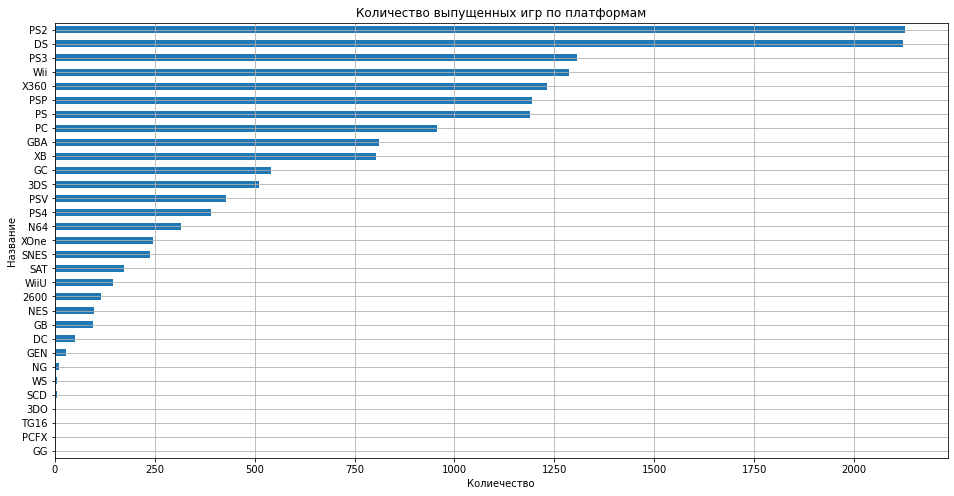

In [31]:
data['platform'].value_counts(ascending=True).plot(kind='barh', grid=True, figsize=(16, 8))
plt.title('Количество выпущенных игр по платформам')
plt.xlabel('Колиечество')
plt.ylabel('Название')
plt.show()

In [32]:
# Отбираем самые популярные платформы. 
pop_platforms = data['platform'].value_counts()
pop_platforms = pop_platforms[pop_platforms > 950]
pop_platforms_list = list(pop_platforms.index)
pop_platforms_list
filtered_data = data
filtered_data = filtered_data[filtered_data['platform'].isin(pop_platforms_list)]
filtered_data
pop_platforms_list

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC']

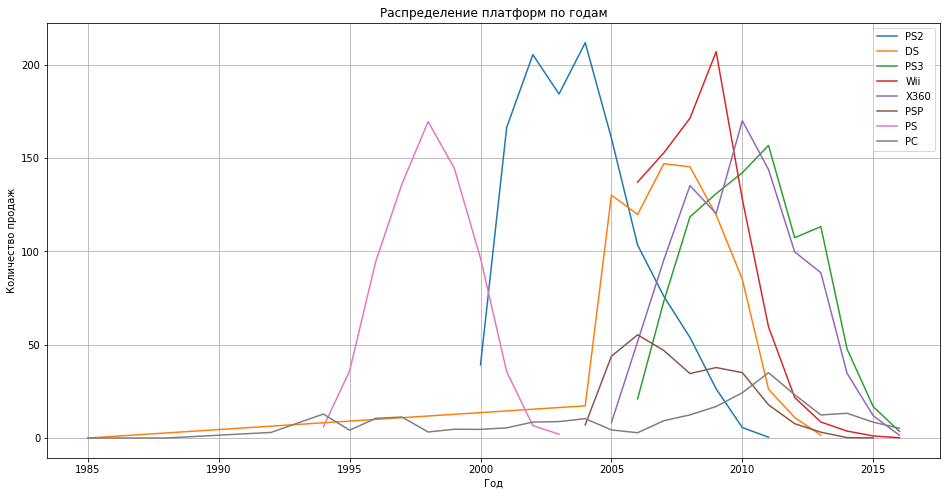

In [33]:
# Строим график 
def p_to_year(df, platform):
    graph = df[df['platform'] == platform].pivot_table(
        index=['year_of_release'], 
        values=['all_sales'], 
        aggfunc=['sum']
    )
    plt.plot(graph, label=platform)

plt.figure(figsize=(16,8))
plt.grid(True)
plt.title('Распределение платформ по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

for platform in pop_platforms_list:   
    p_to_year(filtered_data, platform)

plt.legend()
plt.show()

In [34]:
test = data[data['platform'] == 'DS'].sort_values(by='year_of_release')
test.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.0,101.0,11.0,Unknown,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.0,101.0,11.0,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.0,101.0,11.0,Unknown,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.0,101.0,11.0,Unknown,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.0,101.0,11.0,Unknown,0.19



Рассмотрим срок популярности отдельно каждой платформы:
- PS2 (2000 - 2011) 11 лет
- DS (2004 - 2013) 8 лет
- PS3 (2006 - н.в.) 10 лет
- Wii (2006 - н.в.) 10 лет
- X360 (2005 - н.в.) 11 лет
- PSP (2004 - 2015) 11 лет
- PS (1994 - 2003) 9 лет
- PC (1985 - н.в.)

Основным критерием потери интереса к определенной платформы является устаревание железа. За счет возможности замены компонентов и инидвидуальной сборки комплектующих ПК продержался дольше всех. Но в среднем же срок эксплуатации одной платформы примерно равен 10 лет.

На основе действующих платформ предлагаю считать актуальным период с 2014 по настоящее время.

In [35]:
# Отбираем потенцаильно прибыльные платформы.
all_platforms = data['platform'].value_counts()
all_platforms = all_platforms[all_platforms > 240]
all_platforms_list = list(all_platforms.index)
print(all_platforms_list)

# Составляем датафрейм с актуальными данными
actual_data = data[data['year_of_release'] >= 2002]
actual_data.head()

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB', 'GC', '3DS', 'PSV', 'PS4', 'N64', 'XOne']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


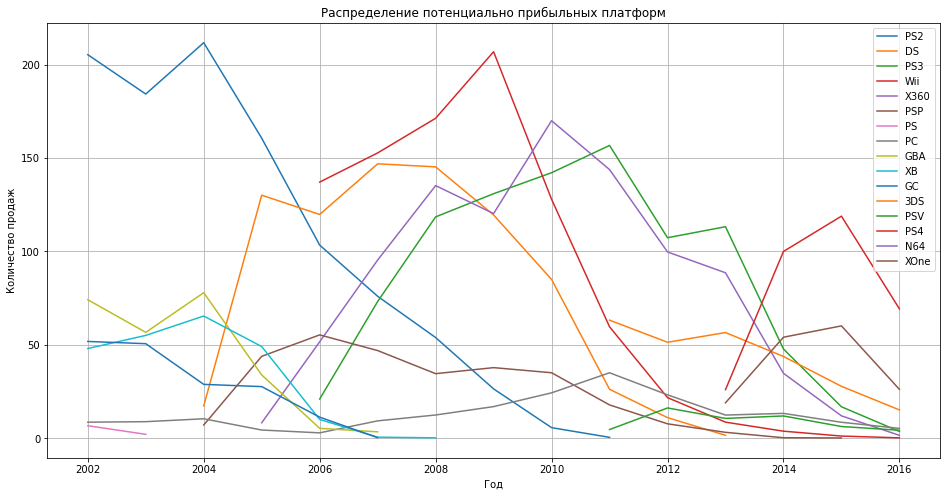

In [36]:
# Строим график по актульным данным.


plt.figure(figsize=(16,8))
plt.grid(True)
plt.title('Распределение потенциально прибыльных платформ')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

for platform in all_platforms_list:
    p_to_year(actual_data, platform)

plt.legend()
plt.show()

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'> После того как я попытался изменить год на 2014, появилась ошибка и график не отрисовывался, с уменьшением года, начало появлсяться все больше линий, но ошибка по прежнему оставалась, но на 2002 году она исезла. Я не знаю как убрать ее , поэтому отрисую график, начиная с 2002 года. Тут хоть что-то видно. Может быть ты подскажешь как ее решить?
        
        Ниже отобрал данные, начиная уже с 2014 года.</font>
</div>

Лидерами продаж становятся PS4 и Xbox One, но оно и не удивительно ведь это самые последние версии консолей на 2016 год. 3DS также входит в тройку лидеров, но в отличие от своих основных конкурентов, количество продаж данной платформы равномерно уменьшается с 2011 года. Остальные платформы показывают существенно меньший обьем продаж. При этом стоит обратить внимание на то, что все платформы показывют отрицательный рост, что говорит об общей стагнации отрасли.

<AxesSubplot:title={'center':'Boxplot по глобальным продажам игр в разбивке по платформам'}, xlabel='platform', ylabel='all_sales'>

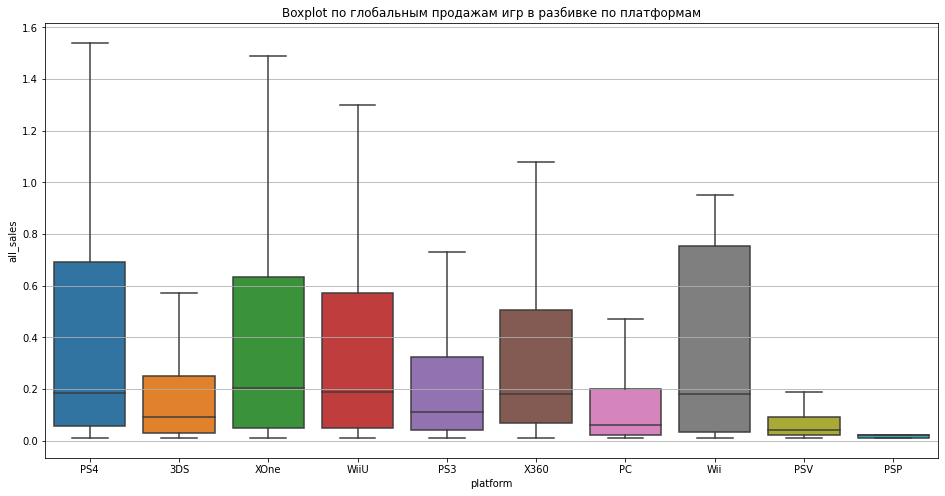

In [37]:
# Составляем датафрейм с актуальными данными
actual_data = data[data['year_of_release'] >= 2014]
actual_data

#График «ящик с усами» по глобальным продажам игр в разбивке по платформам.
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.title('Boxplot по глобальным продажам игр в разбивке по платформам')
sns.boxplot(data=actual_data, x="platform", y="all_sales", showfliers = False)

<AxesSubplot:title={'center':'Boxplot по глобальным продажам игр в разбивке по платформам'}, xlabel='platform', ylabel='all_sales'>

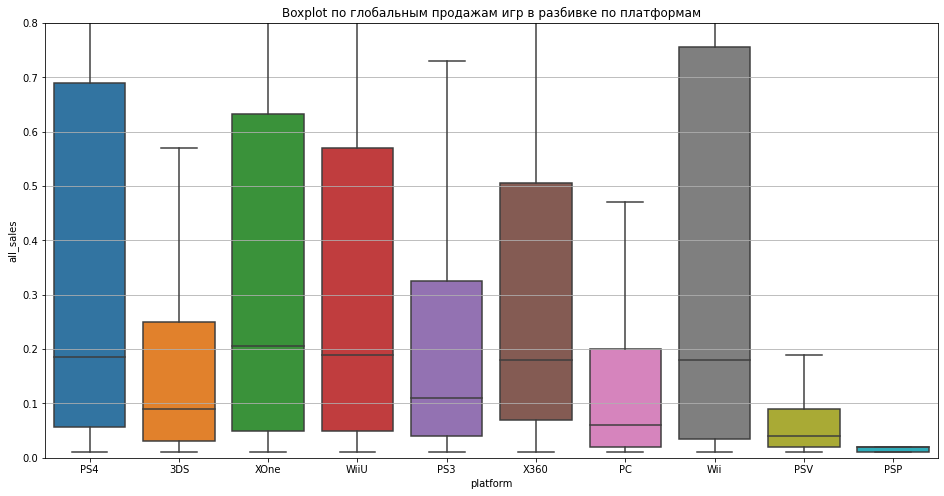

In [38]:
#График «ящик с усами» по глобальным продажам игр в разбивке по платформам.
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.ylim(0, 0.8)
plt.title('Boxplot по глобальным продажам игр в разбивке по платформам')
sns.boxplot(data=actual_data, x="platform", y="all_sales", showfliers = False)

In [39]:
actual_data['all_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: all_sales, dtype: float64

In [40]:
# Применим метод Describe к самым популярным платформам
top_list = ['Wii', 'PS4', 'XOne', 'WiiU', 'X360', 'PS3', '3DS', 'PC']
for platform in top_list:
    print(platform)
    print(actual_data[actual_data['platform'] == platform]['all_sales'].describe())
    print('')

Wii
count    11.000000
mean      0.460909
std       0.625451
min       0.010000
25%       0.035000
50%       0.180000
75%       0.755000
max       2.010000
Name: all_sales, dtype: float64

PS4
count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: all_sales, dtype: float64

XOne
count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: all_sales, dtype: float64

WiiU
count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: all_sales, dtype: float64

X360
count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: all_sales, dtype: float64

PS3
count    219.000000
mean

Медиана всех платформ в среднем равна 0.1, а средние значение - 0.43. Самыми потенциально выгодными платформами будут являться Wii, PS4, XOne и WiiU. Также хорошо себя показали PS3 и X360, но нужно помнить, что это прошлое поколение консолей и скоро их поддержка прекратится. Также не стоит забывать и о таких популярных платформах, как PC и 3DS. PSP и PSV показали худшие результаты. Видимо, рынок портативных консолей проигрывают рынку мобильного гейминга.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.

In [41]:
x_360 = actual_data[actual_data['platform'] == 'X360']
x_360 = x_360[x_360['user_score'] != 11]
x_360 = x_360[x_360['critic_score'] != 101]

0.33651362483599345

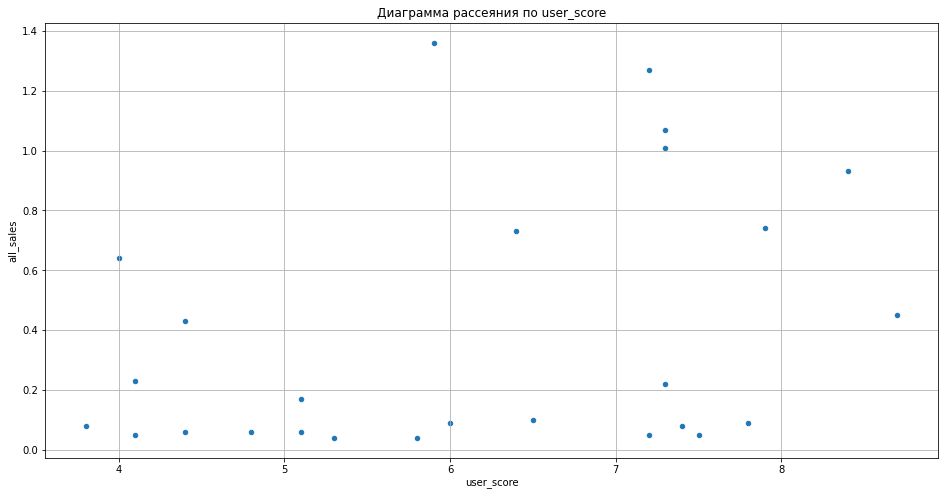

In [42]:
x_360.plot(kind='scatter', x='user_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по user_score')
x_360['user_score'].corr(x_360['all_sales'])

0.5257228356581523

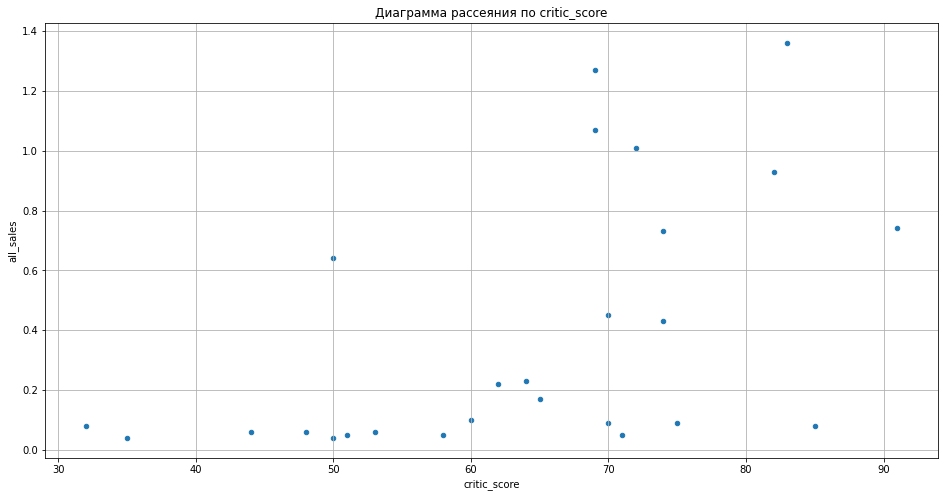

In [43]:
x_360.plot(kind='scatter', x='critic_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по critic_score')
x_360['critic_score'].corr(x_360['all_sales'])

**Вывод:** Связи между оценками пользователей и количеством продаж практически нет из-за выбросов на более низких оценках, а вот между оценками критиков есть прямая  корреляция, хоть и не очень сильная. То есть, в среднем, чем больше отзыв критика, тем больше игра может принести прибыли.

In [44]:
ps_3 = actual_data[actual_data['platform'] == 'PS3']
ps_3 = ps_3[ps_3['user_score'] != 11]
ps_3 = ps_3[ps_3['critic_score'] != 101]

0.15659516181359956

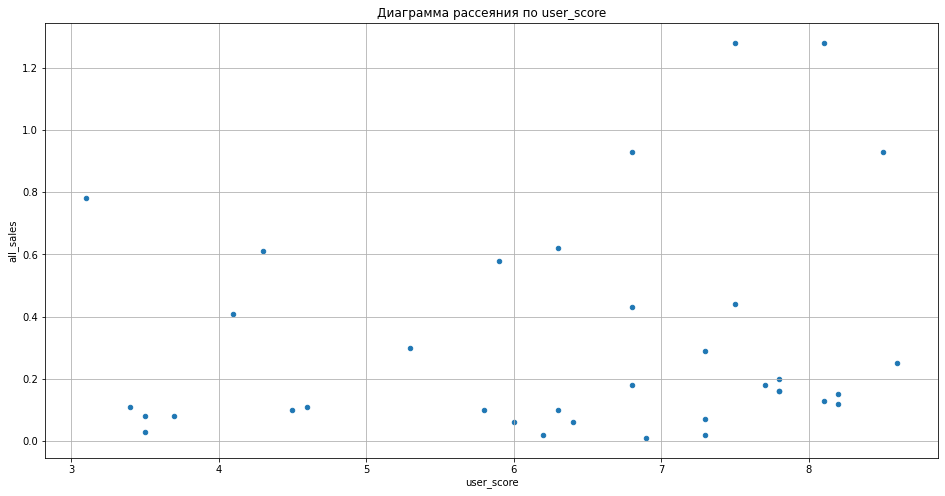

In [45]:
ps_3.plot(kind='scatter', x='user_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по user_score')
ps_3['user_score'].corr(ps_3['all_sales'])

0.44657460493190704

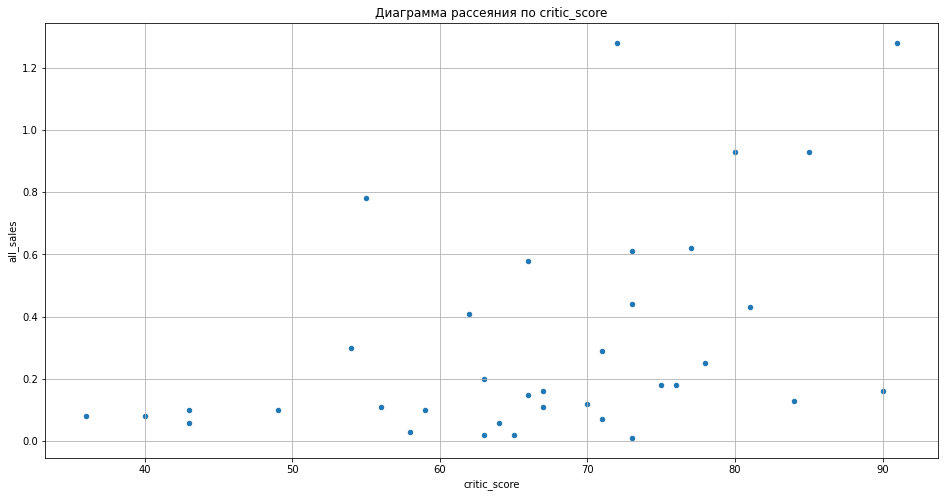

In [46]:
ps_3.plot(kind='scatter', x='critic_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по critic_score')
ps_3['critic_score'].corr(ps_3['all_sales'])

In [47]:
ps_4 = actual_data[actual_data['platform'] == 'PS4']
ps_4 = ps_4[ps_4['user_score'] != 11]
ps_4 = ps_4[ps_4['critic_score'] != 101]

-0.04318585997193634

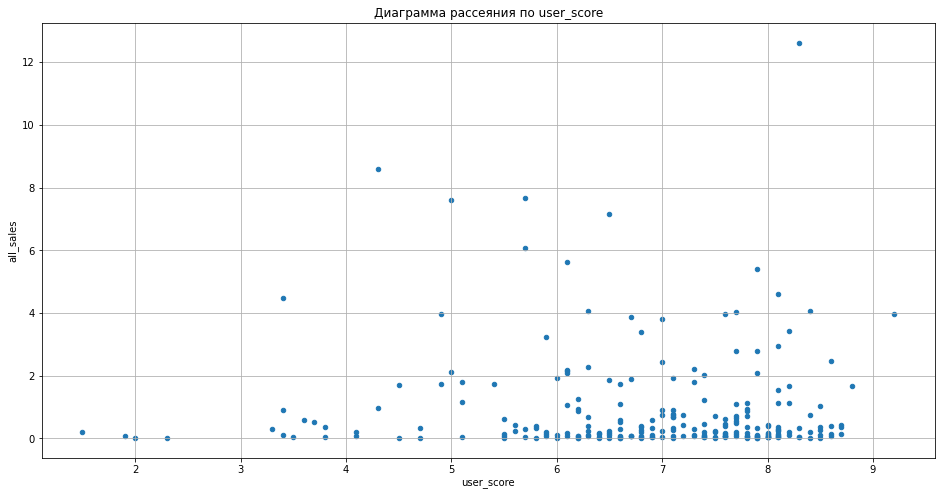

In [48]:
ps_4.plot(kind='scatter', x='user_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по user_score')
ps_4['user_score'].corr(ps_4['all_sales'])

0.40190287811475334

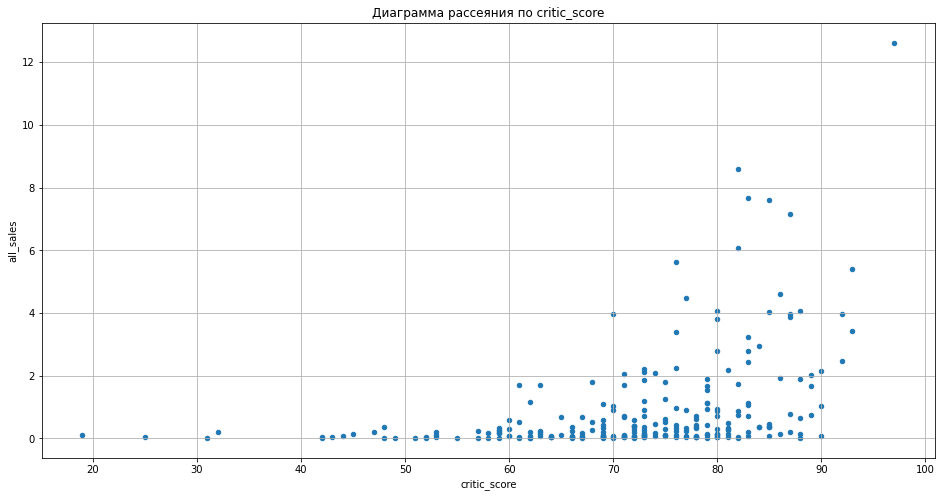

In [49]:
ps_4.plot(kind='scatter', x='critic_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по critic_score')
ps_4['critic_score'].corr(ps_4['all_sales'])

In [50]:
x_one = actual_data[actual_data['platform'] == 'XOne']
x_one = x_one[x_one['user_score'] != 11]
x_one = x_one[x_one['critic_score'] != 101]

-0.0917343450331075

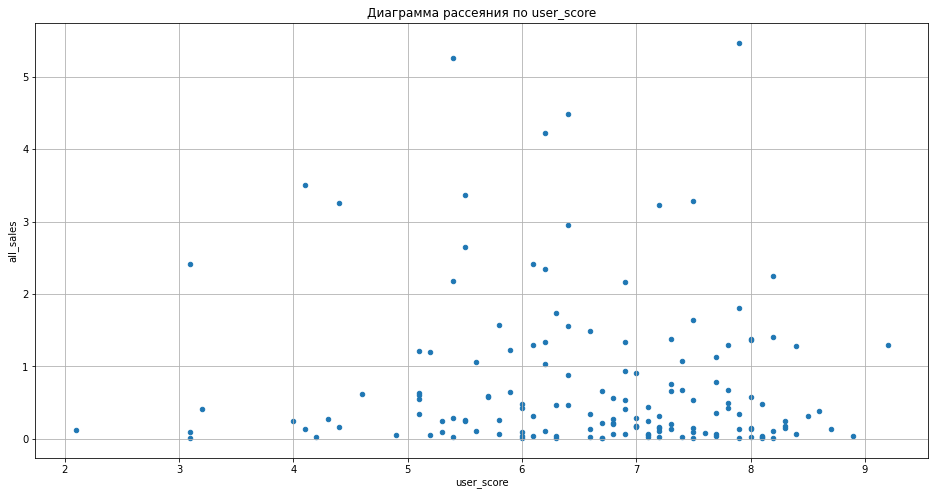

In [51]:
x_one.plot(kind='scatter', x='user_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по user_score')
x_one['user_score'].corr(x_one['all_sales'])

0.42211185105557647

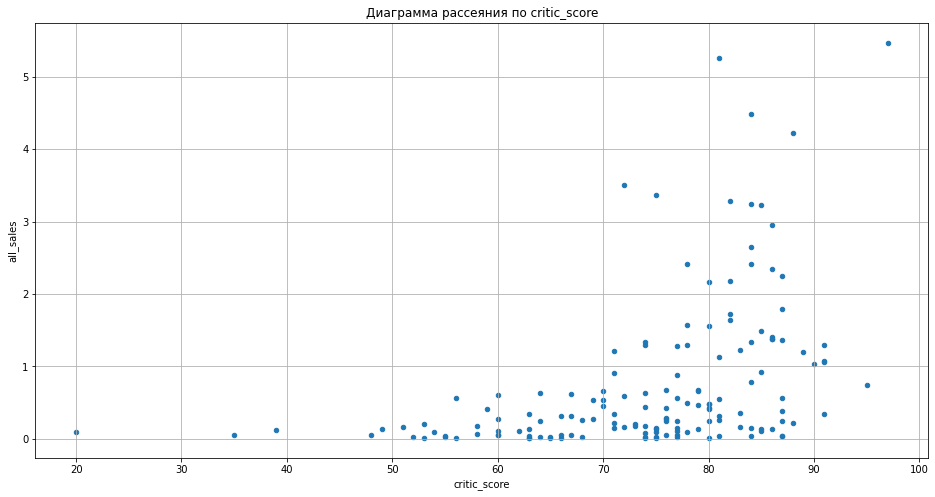

In [52]:
x_one.plot(kind='scatter', x='critic_score', y='all_sales', figsize=(16,8))
plt.grid(True)
plt.title('Диаграмма рассеяния по critic_score')
x_one['critic_score'].corr(x_one['all_sales'])

Исследования других потенциально прибыльных платформ подтверждают изначальные выводы.

### Общее распределение игр по жанрам
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

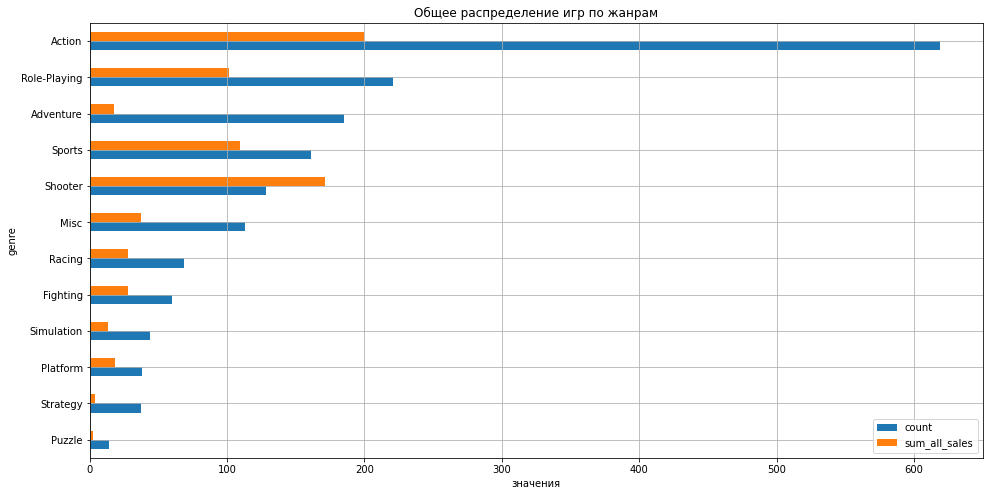

In [53]:
genre = actual_data.pivot_table(index=['genre'], values=['all_sales'], aggfunc=['count','sum'])
genre.columns = ['count', 'sum_all_sales']
genre.sort_values(by='count', ascending=True).plot(kind='barh', figsize=(16, 8))
plt.grid(True)
plt.title('Общее распределение игр по жанрам')
plt.xlabel('значения')
plt.show()

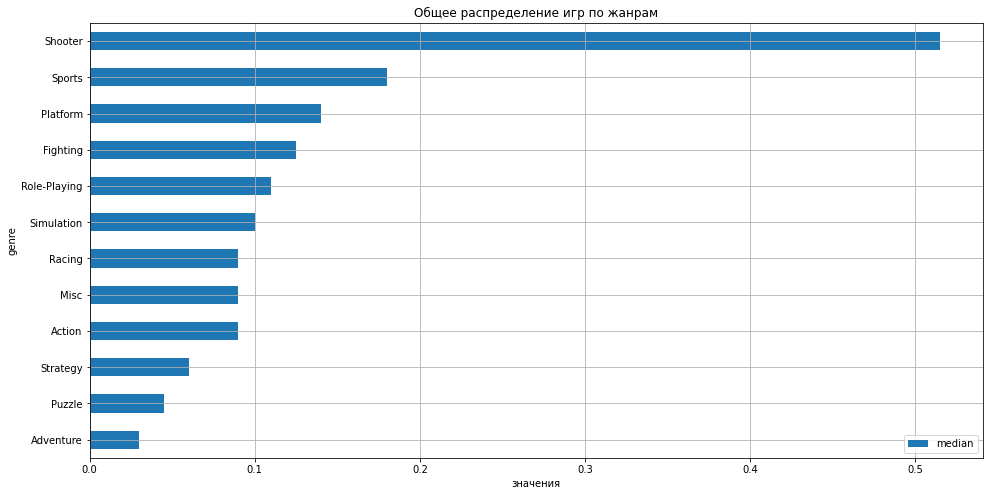

In [54]:
genre = actual_data.pivot_table(index=['genre'], values=['all_sales'], aggfunc=['median'])
genre.columns = ['median']
genre.sort_values(by='median', ascending=True).plot(kind='barh', figsize=(16, 8))
plt.grid(True)
plt.title('Общее распределение игр по жанрам')
plt.xlabel('значения')
plt.show()

 
Наиболее прибыльные жанры:
1. Action 
2. Sports
3. Shooter
4. Misc
5. Role-Playing

Жанры с наибольшим количеством выпущенных игр:
1. Action 
2. Sports
3. Misc
4. Role-Playing
5. Adventure

Наиболее прибыльные жанры по медиане:
1. Shooter 
2. Sports
3. Platform
4. Fighting
5. Role-Playing


Количество проданных игр опредленного жанра не всегда имеет прямую связь с прибылью. Так, например, стоит отметить, что adventure входит в топ-5 жанров с наибольшим количеством выпущенных игр, а по прибыли занимает одно из последних мест. Возможно производство таких игр стоит слишком больших вложений, что понижает конечный профит. Также несмотря на то, что Shooter по колиеству занимает аж 6 место, по прибыли он третий. Можно предположить, что это один из самых выгодных жанров. Это утверждение подтверждает исследование по медианам, где данный жанр рсположился на первом месте, а за ним идут: Sports, Platform, Fighting, Role-Playing.

**Вывод:** До 1995 года ежегодно выпускалось довольно мало игр, но после началось их активное производство, которое достигло своего пика в 2008-2009 годах, после чего в индустрии начался спад и выход на плато (с 2013 по 2016 годы количество выпускаемых игр было в диапозоне от 400 до 600). Скорее всего это было связано с развитием технологий и изменением качества видеоигр - они стали более комплексным и дорогими в производстве.

Основным критерием потери интереса к определенной платформы является устаревание железа. За счет возможности замены компонентов и инидвидуальной сборки комплектующих ПК продержался дольше всех. Но в среднем же срок эксплуатации одной платформы примерно равен 10 лет. На основе действующих платформ предлагаю считать актуальным период с 2005 по настоящее время. Лидерами продаж становятся PS4 и Xbox One, но оно и не удивительно ведь это самые последние версии консолей на 2016 год. 3DS также входит в тройку лидеров, но в отличие от своих основных конкурентов, количество продаж данной платформы равномерно уменьшается с 2011 года. Остальные платформы показывают существенно меньший обьем продаж. При этом стоит обратить внимание на то, что все платформы показывют отрицательный рост, что говорит об общей стагнации отрасли. Медиана всех платформ лежит в диаопозоне от 0.1 до 0.3, а средние значения от 0.1 до 0.8. Несмотря на то что 3DS вошла в топ-3 платформ по продажаам в 2016 году, ее средние показатели оставляют желать лучшего. Самыми потенциально выгодными платформами будут являться текущее и предыдущие поколений консолей от Sony и Microsoft - PS3, PS4, X360, XOne.

Связи между оценками пользователей и количеством продаж практически нет из-за выбросов на более низких оценках, а вот между оценками критиков есть прямая корреляция, хоть и не очень сильная. То есть, в среднем, чем больше отзыв критика, тем больше игра может принести прибыли.


Количество проданных игр опредленного жанра не всегда имеет прямую связь с прибылью. Так, например, стоит отметить, что adventure входит в топ-5 жанров с наибольшим количеством выпущенных игр, а по прибыли занимает одно из последних мест. Возможно производство таких игр стоит слишком больших вложений, что понижает конечный профит. Также несмотря на то, что Shooter по колиеству занимает аж 6 место, по прибыли он третий. Можно предположить, что это один из самых выгодных жанров. Это утверждение подтверждает исследование по медианам, где данный жанр рсположился на первом месте, а за ним идут: Sports, Platform, Fighting, Role-Playing.

## Составление портрета пользователя каждого региона

### Портрет пользователя региона NA

#### Самые популярные платформы (топ-5)
Опишите различия в долях продаж.

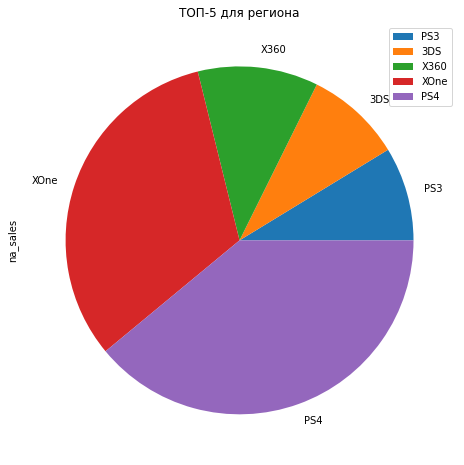

In [55]:
def top_region(region, column, data=actual_data, number=5):
    some_region = data.pivot_table(index=[column], values=[region], aggfunc=['sum'])
    some_region.columns = [region]
    some_region = some_region.sort_values(by=region, ascending=False)
    some_region = some_region[:number]
    some_region.sort_values(by=region).plot(kind='pie', y=region, figsize=(16, 8))
    plt.title('ТОП-5 для региона')
    plt.legend()
    plt.show()
    
top_region('na_sales', 'platform')

#### Самые популярные жанры (топ-5)
Поясните разницу.

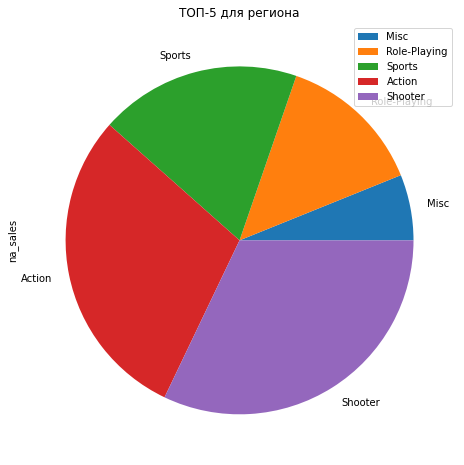

In [56]:
top_region('na_sales', 'genre')

#### Влияние рейтинга ESRB на продажи в регионе

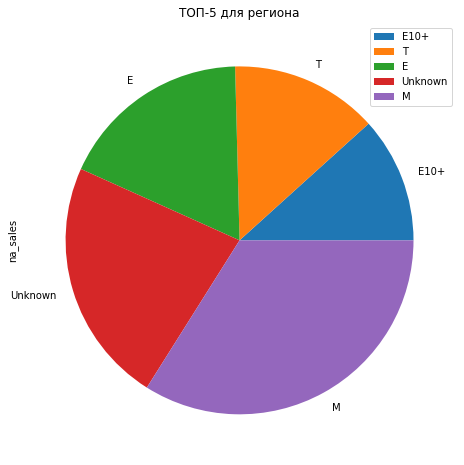

In [57]:
rate = actual_data.dropna(subset=['rating'])
top_region('na_sales', 'rating', rate, 6)

- Портрет пользователй региона North America
    - топ платформ: PS4, XOne, X360, 3DS, PS3 
    - топ жанров: Shooter, Action, Sports, Role-Playing, Misc
    - влияние рейтинга: M, Unknown, E, T, E10+

###  Портрет пользователя региона EU

#### Самые популярные платформы (топ-5)
Опишите различия в долях продаж.

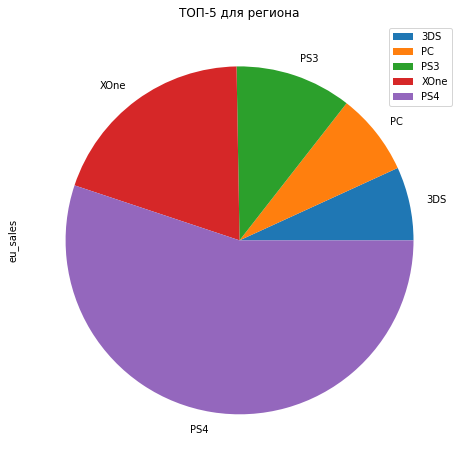

In [58]:
top_region('eu_sales', 'platform')

#### Самые популярные жанры (топ-5)
Поясните разницу.

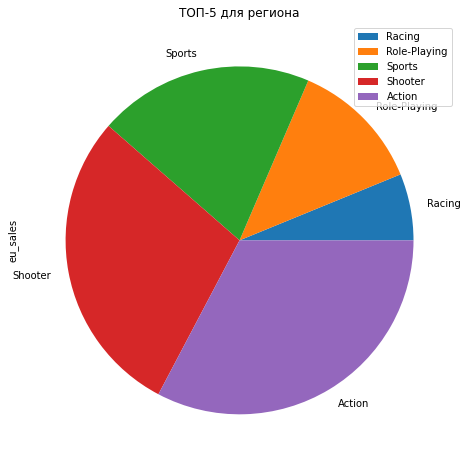

In [59]:
top_region('eu_sales', 'genre')

#### Влияние рейтинга ESRB на продажи в регионе

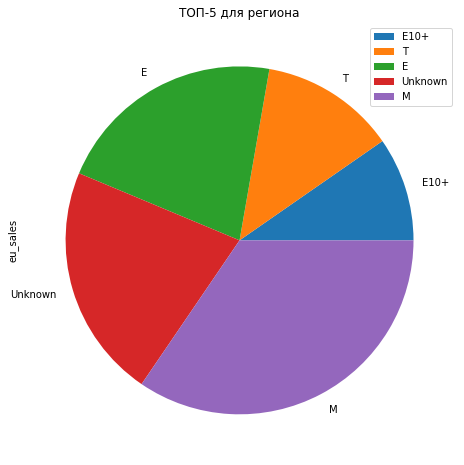

In [60]:
top_region('eu_sales', 'rating', rate, 6)

- Портрет пользователй региона Europe
    - топ платформ: PS4, XOne, PS3, PC, 3DS
    - топ жанров: Action, Shooter, Sports, Role-Playing, Racing
    - влияние рейтинга: M, Unknown, E, T, E10+

###  Портрет пользователя региона JP

#### Самые популярные платформы (топ-5)
Опишите различия в долях продаж.

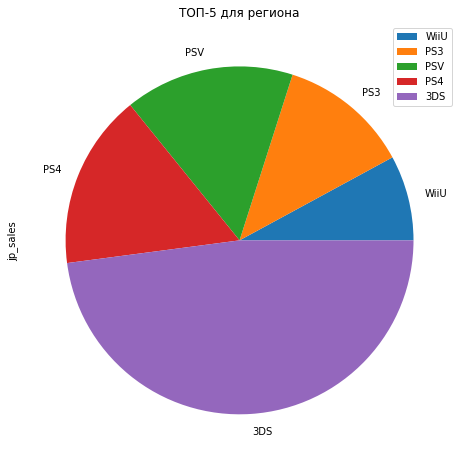

In [61]:
top_region('jp_sales', 'platform')

#### Самые популярные жанры (топ-5)
Поясните разницу.

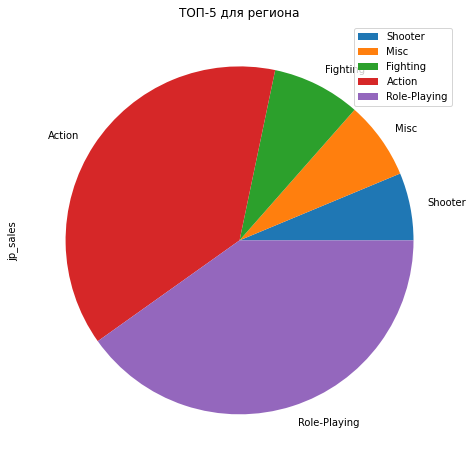

In [62]:
top_region('jp_sales', 'genre')

#### Влияние рейтинга ESRB на продажи в регионе

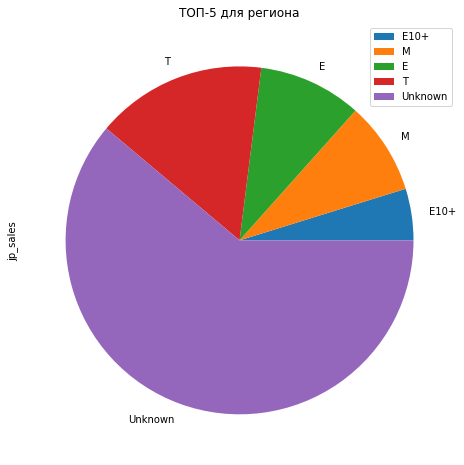

In [63]:
top_region('jp_sales', 'rating', rate, 6)

- Портрет пользователй региона Japan
    - топ платформ: 3DS, PS4, PSV, PS3, WiiU
    - топ жанров: Role-Playing, Action, Fighting, Misc, Shooter
    - влияние рейтинга: Unknown, T, E, M, E10+

- Портрет пользователй региона North America
    - топ платформ: PS4, XOne, X360, 3DS, PS3 
    - топ жанров: Shooter, Action, Sports, Role-Playing, Misc
    - влияние рейтинга: M, Unknown, E, T, E10+
    
    
- Портрет пользователй региона Europe
    - топ платформ: PS4, XOne, PS3, PC, 3DS
    - топ жанров: Action, Shooter, Sports, Role-Playing, Racing
    - влияние рейтинга: M, Unknown, E, T, E10+
 
 
- Портрет пользователй региона Japan
    - топ платформ: 3DS, PS4, PSV, PS3, WiiU
    - топ жанров: Role-Playing, Action, Fighting, Misc, Shooter
    - влияние рейтинга: Unknown, T, E, M, E10+
    
    
**Вывод:** Рынки North America и Europe довольно схожи друг с другом по всем параметрам: популярны одни и те же платформы (правда в Europe в топ лидеров вошеш PC), жанры и влияение оценок на продажи тоже практически полностью совпадают.

На фоне остальных сильно выделяется рынок Японии, где отечественные компании (Nintendo и Sony) заняли большую часть рынка консолей (вытеснив PC и игровые платформы Microsoft), а в топе популряных жанров поднялись наверх Role-Playing, Action, Fighting. Также в Японии лидерами продаж являются игры без рейтинга ESRB. При выпуске игр под японский рынок необходимо учитвать его спицифику, в сравнении с американским и европейским.  

## Провека гипотез

### Гипотеза о пользовательских рейтингах платформ Xbox One и PC
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [64]:
hyp = actual_data[actual_data['user_score'] != 11]
xbox = hyp[hyp['platform'] == 'XOne']['user_score']
pc = hyp[hyp['platform'] == 'PC']['user_score']

alpha = 0.05
result_1 = st.ttest_ind(xbox, pc)

print(f'P-value: {result_1.pvalue}')
if result_1.pvalue < alpha: print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')

P-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Следовательно, средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковы.

### Гипотеза о средних пользовательских рейтингах жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)


H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [65]:
hyp = actual_data[actual_data['user_score'] != 11]
action = hyp[hyp['genre'] == 'Action']['user_score']
sports = hyp[hyp['genre'] == 'Sports']['user_score']

alpha = 0.05
result_2 = st.ttest_ind(action, sports)

print(f'P-value: {result_2.pvalue}')
if result_2.pvalue < alpha: print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')

P-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Следовательно, средние пользовательские рейтинги жанров Action и Sports могут быть различными.

За нулевые принимаем гипотезы о равенстве средних двух выборок, а за альтернативную оставшиеся значения с двух сторон, так как нас интересует именно равенство/неравенство, а больше или меньше среднее для нас в данном случае неважно. Был применен ttest_ind(), так как на вход подаются две независимые выборки.

## Общий вывод
На этапе **подготовки данных** названия столбцов были приведены к нижнему регистру и подобраны нужные типы данных для столбцов, были обработаны и заполнены пропуски в столбцах, там где это можно было обосновать. Также высказано предположение о причине пропусков: видно что больше всего пропусков оценок как критиков, так и игроков в промежутке с 2005 до 2010 года, также локальный пик виден между 1995 и 2000 годом. Возомжно, что тогда было не принято выставлять оценки или это было не популярно, так как массовая игровая индустрия только развивалась. Этот вывод можно сделать на основе того, что графики пропусков практические повторяют друг друга. Если бы причина была технического характера, то маловероятно, что она бы затронула оба столбца практически идентично.

На этапе **исследовательского анилиза данных** были сделаны следующие выводы:
- До 1995 года ежегодно выпускалось довольно мало игр, но после началось их активное производство, которое достигло своего пика в 2008-2009 годах, после чего в индустрии начался спад и выход на плато (с 2013 по 2016 годы количество выпускаемых игр было в диапозоне от 400 до 600). Скорее всего это было связано с развитием технологий и изменением качества видеоигр - они стали более комплексным и дорогими в производстве.Основным критерием потери интереса к определенной платформы является устаревание железа. За счет возможности замены компонентов и инидвидуальной сборки комплектующих ПК продержался дольше всех. Но в среднем же срок эксплуатации одной платформы примерно равен 10 лет. На основе действующих платформ предлагаю считать актуальным период с 2014 по настоящее время. Самыми потенциально выгодными платформами будут являться текущее и предыдущие поколений консолей от Sony и Microsoft - PS3, PS4, X360, XOne.
- Связи между оценками пользователей и количеством продаж практически нет из-за выбросов на более низких оценках, а вот между оценками критиков есть прямая корреляция, хоть и не очень сильная. То есть, в среднем, чем больше отзыв критика, тем больше игра может принести прибыли.
- Количество проданных игр опредленного жанра не всегда имеет прямую связь с прибылью. Так, например, стоит отметить, что adventure входит в топ-5 жанров с наибольшим количеством выпущенных игр, а по прибыли занимает одно из последних мест. Возможно производство таких игр стоит слишком больших вложений, что понижает конечный профит. Также несмотря на то, что Shooter по колиеству занимает аж 6 место, по прибыли он третий. Можно предположить, что это один из самых выгодных жанров.

На этапе **составления портрета регионального пользователся** были сделаны следующие выводы:
- Рынки North America и Europe довольно схожи друг с другом по всем параметрам: популярны одни и те же платформы (правда в Europe в топ лидеров вошеш PC), жанры и влияение оценок на продажи тоже практически полностью совпадают.

- На фоне остальных сильно выделяется рынок Японии, где отечественные компании (Nintendo и Sony) заняли большую часть рынка консолей (вытеснив PC и игровые платформы Microsoft), а в топе популряных жанров поднялись наверх Role-Playing, Action, Fighting. Также в Японии лидерами продаж являются игры без рейтинга ESRB. При выпуске игр под японский рынок необходимо учитвать его спицифику, в сравнении с американским и европейским.   


**Рекомендации к рекламной компании:** 

 - В регионах North America и Europe в качестве основых платформ рекомендую взять две самые актуальные и популярные консоли: PS4 и XOne. Что касается жанров, рекомендую присмотреться также к самым популярным: Shooter, Action, Sports и Role-Playing с рейтингом M, E или незаполенным, так как на них приходтся 3/4 всех продаж
 - В регионе Japan в качестве основых платформ рекомендую взять две самые актуальные и популярные консоли данного региона: 3DS и PS4. Что касается жанров, рекомендую присмотреться также к самым популярным: Role-Playing или Action, так как на них приходится более 80% рынка. Рейтинг ESRB в Японии не показателен: большинство продаж приходится на игры без него или с рейтингом T.
 
 Также во всех регионах стоит примсмотреться к оценкам критиков, они коррелируют с количеством прибыли.